# **NLP ASSIGNMENT 1**
## **KABIR CHATURVEDI, J011**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import warnings
from nltk.corpus import stopwords

In [ ]:
df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df.iloc[:,:2]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
ham = df[df['v1']=='ham']
ham.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...


In [ ]:
spam = df[df['v1']=='spam']
spam.head()

,v1,v2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [ ]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

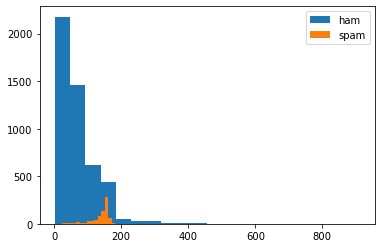

In [ ]:
ham_len = ham['v2'].str.len()
spam_tweet_len=spam['v2'].str.len()
plt.hist(ham_len,bins=20,label='ham')
plt.hist(spam_tweet_len,bins=20,label='spam')
plt.legend()
plt.show()

Text(0.5, 1.0, 'HAM vs SPAM')

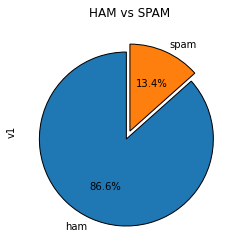

In [ ]:
df['v1'].value_counts().plot.pie(explode = [0.1,0], autopct = "%.1f%%",startangle = 90, wedgeprops={'edgecolor':'black', 'linewidth':1}).set_title('HAM vs SPAM')

***
## **Now we create the WordCloud:**
***

In [ ]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

In [ ]:
comment_words = ""
for val in df.v2:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

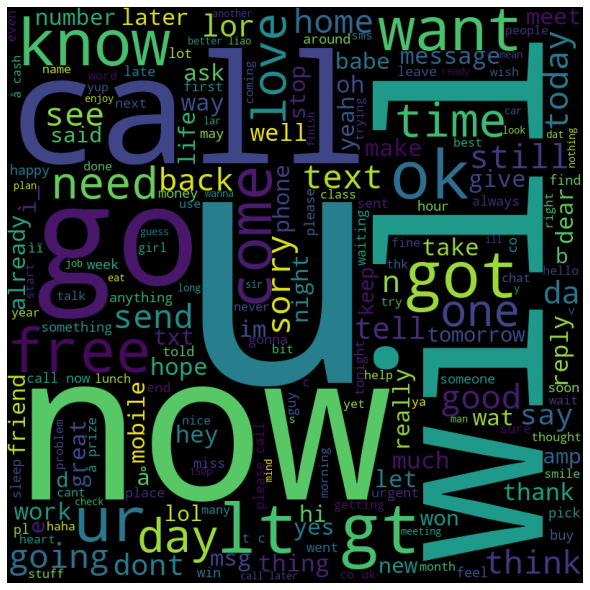

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

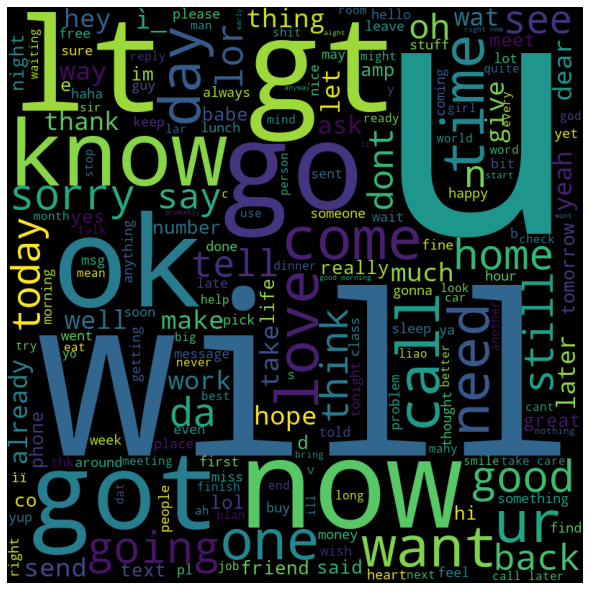

In [ ]:
ham_words = ""
for val in ham.v2:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    ham_words += " ".join(tokens)+" "


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(ham_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

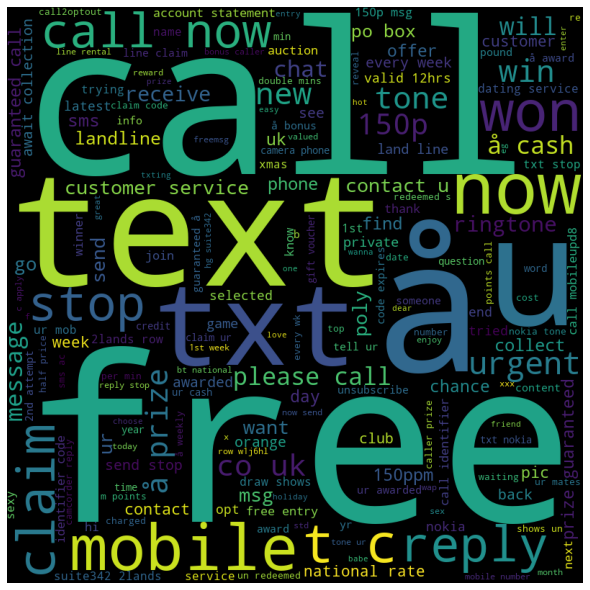

In [ ]:
spam_words = ""
for val in spam.v2:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    spam_words += " ".join(tokens)+" "


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(spam_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

###**DATA PREPROCESSING:**

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
text = []

In [ ]:
#Removing Punctuations and stopwords alonside converting alphabets into lowercase
for i in range(len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['v2'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    text.append(review)

### **Converting words into vectors using TFIDF:**


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=1000) 
X =  cv.fit_transform(text).toarray()
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
y = pd.get_dummies(df['v1'])
y = y.iloc[:,1].values #Label Encoding

## **Splitting the data:**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

### Applying different ML models

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [ ]:
NB_pred = NB.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print(metrics.classification_report(y_test, NB_pred))
print()
print(metrics.confusion_matrix(y_test, NB_pred))
print()
print(accuracy_score(y_test, NB_pred))

              precision    recall  f1-score   support

           0       0.99      0.79      0.87       976
           1       0.38      0.92      0.54       139

    accuracy                           0.80      1115
   macro avg       0.68      0.85      0.71      1115
weighted avg       0.91      0.80      0.83      1115


[[767 209]
 [ 11 128]]

0.8026905829596412


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train , y_train)

LogisticRegression()

In [ ]:
logreg_pred = logreg.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, logreg_pred))
print()
print(metrics.confusion_matrix(y_test, logreg_pred))
print()
print(accuracy_score(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       976
           1       0.97      0.87      0.92       139

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115


[[972   4]
 [ 18 121]]

0.9802690582959641


In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [ ]:
svc_pred = svc.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, svc_pred))
print()
print(metrics.confusion_matrix(y_test, svc_pred))
print()
print(accuracy_score(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       976
           1       1.00      0.93      0.96       139

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.98      1115
weighted avg       0.99      0.99      0.99      1115


[[976   0]
 [ 10 129]]

0.9910313901345291


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=31)
RF.fit(X_train,y_train)

RandomForestClassifier(random_state=31)

In [ ]:
RF_pred = RF.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, RF_pred))
print()
print(metrics.confusion_matrix(y_test, RF_pred))
print()
print(accuracy_score(y_test, RF_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       976
           1       0.97      0.94      0.95       139

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115


[[972   4]
 [  9 130]]

0.9883408071748879


***
## *CONCLUSION*: **We get the highest accuracy by using SVC.**
***